In [1]:
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
def fp(data,w,act):
     return act(data.dot(w))
    
def sigmoid(inX): 
    return 1.0/(1+exp(-inX)) 

def ReLU(inX):
    return min(0,inX)

In [3]:
 def genImage(pWidth = 320,pHeight = 320,nHidden = 8,nNetwork = 16):
    N_COLOR = 3
    N_INPUT = 3  #x,y,bias


    #init model
    model = [None] * (nHidden + 1)
    model[0] = random.rand(N_INPUT,nNetwork) * 2 - 1
    for i in range(1,nHidden):
        model[i] = random.rand(nNetwork+1,nNetwork) * 2 - 1

    model[nHidden] = random.rand(nNetwork+1,N_COLOR) * 2 - 1

    #fp
    img = zeros((pHeight,pWidth,3))
    for i in range(pWidth):
        for j in range(pHeight):
            data = array([i/pWidth,j/pHeight,1])
            for k in range(nHidden):
                data = append(fp(data,model[k],tanh),[1])
            data = fp(data,model[nHidden],sigmoid)
            img[j,i] = data

    return img

###批量计算数倍性能提升

In [4]:
 def genImage(pWidth = 320,pHeight = 320,nHidden = 8,nNetwork = 16):
    N_COLOR = 3
    N_INPUT = 3  #x,y,bias


    #init model
    model = [None] * (nHidden + 1)
    model[0] = random.rand(N_INPUT,nNetwork) * 2 - 1
    for i in range(1,nHidden):
        model[i] = random.rand(nNetwork+1,nNetwork) * 2 - 1

    model[nHidden] = random.rand(nNetwork+1,N_COLOR) * 2 - 1

    #fp
    img = zeros((pHeight,pWidth,3))
    data = array([[i/pHeight,j/pWidth,1] for i in range(pHeight) for j in range(pWidth) ])
    for k in range(nHidden):
        data = hstack((fp(data,model[k],tanh),array([[1]]*pWidth*pHeight)))
    data = fp(data,model[nHidden],sigmoid)
    img = data.reshape(pHeight,pWidth,N_COLOR)

    return img

CPU times: user 11.9 s, sys: 1.26 s, total: 13.2 s
Wall time: 1.88 s


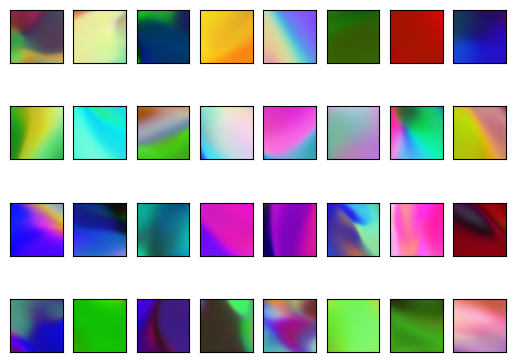

In [6]:
%%time
fig, axes = plt.subplots(4, 8, #figsize=(5,5),
                         subplot_kw={'xticks': [], 'yticks': []})

#fig.subplots_adjust(hspace=0.3, wspace=0.05)
for ax in axes.reshape(-1):
    ax.imshow(genImage(128,128))

In [7]:
from time import localtime,strftime
w = 2560
h = 1600
for _ in range(200):
    img = genImage(w,h)
    t = strftime('%Y%m%d.%H%M%S',localtime())
    imsave('netart_pic/'+t +'.%dx%d.png'% (w,h),img)

FileNotFoundError: [Errno 2] No such file or directory: 'netart_pic/20250621.173616.2560x1600.png'

####参数对结果的影响

In [ ]:
from time import clock

with open('netart_pic/params/clock.txt','a') as f:
    print('nNetwork nLayer count time(s)', file=f)
    #for i in range(1,128):
    for i in range(128,129):
        for j in range(1,32):
            for k in range(8):
                t = clock()
                img = genImage(320,320,j,i)
                t = clock() - t
                print('%d %d %d %f' % (i,j,k,t),file=f)
                f.flush()
                imsave('netart_pic/params/%dx%d-%d.png'% (i,j,k),img)

####性能比较

In [46]:
%%time
from time import localtime,strftime
w = 1600
h = 900

img = genImage(w,h)
t = strftime('%Y%m%d.%H%M%S',localtime())
imsave('netart_pic/'+t +'.%dx%d.png'% (w,h),img)

Wall time: 4min 8s


In [49]:
%%time
from time import localtime,strftime
w = 1600
h = 900

img = genImage_c(w,h)
t = strftime('%Y%m%d.%H%M%S',localtime())
imsave('netart_pic/'+t +'.%dx%d.png'% (w,h),img)

Wall time: 4min 6s


####Cpython的方法并不能有效的提高性能

In [47]:
%load_ext Cython

In [48]:
%%cython
from decimal import Decimal
from numpy import exp
def fp(data,w,act):
     return act(data.dot(w))
    
def sigmoid(inX): 
    return 1.0/(1+exp(-inX)) 

def ReLU(inX):
    return min(0,inX)
from numpy import array
import random
import numpy as np
zeros = np.zeros
append = np.append
tanh = np.tanh
def genImage_c(pWidth = 64,pHeight = 64,nHidden = 8,nNetwork = 16):
    N_COLOR = 3
    N_INPUT = 3  #x,y,bias


    #init model
    model = [None] * (nHidden + 1)
    model[0] = np.random.rand(N_INPUT,nNetwork) * 2 - 1
    for i in range(1,nHidden):
        model[i] = np.random.rand(nNetwork+1,nNetwork) * 2 - 1

    model[nHidden] = np.random.rand(nNetwork+1,N_COLOR) * 2 - 1

    #fp
    img = zeros((pWidth,pHeight,3))
    for i in range(pWidth):
        for j in range(pHeight):
            data = array([i/pWidth,j/pHeight,1])
            for k in range(nHidden):
                data = append(fp(data,model[k],tanh),[1])
            data = fp(data,model[nHidden],sigmoid)
            img[i,j] = data

    return img

In [143]:
dir(random.rand)

['__call__',
 '__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__le__',
 '__lt__',
 '__module__',
 '__name__',
 '__ne__',
 '__new__',
 '__qualname__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__self__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__text_signature__']